In [1]:
import matplotlib.pyplot as plt
import numpy as np

from itertools import product


import pandas as pd
import os
import re
from scipy.sparse import coo_matrix

from mirnylib.numutils import zoomArray

from multiprocessing import Pool
import pickle

from scipy.ndimage import gaussian_filter1d

## Some function definitions

In [ ]:
#  helper function to aid with plotting
def _gridspec_inches(wcols, hrows, wspace=0.5, hspace=0.5, fig_kwargs={}):
    """
    Output
    ------
    fig : figure handle
    
    gs : gridspec handle to be used in plt.subplot(gs[index])    
    """
        
    fig = plt.figure()
    fig_height_inches = (sum(hrows))
    fig_width_inches = (sum(wcols))

    fig=plt.figure(
        figsize=(fig_width_inches,fig_height_inches),
        subplotpars=matplotlib.figure.SubplotParams(
        left=0,
        right=1,
        bottom=0,
        top=1,
        wspace =0,
        hspace = 0.0),
        **fig_kwargs)
    fig.set_size_inches(fig_width_inches,fig_height_inches,forward=True)

    gs = matplotlib.gridspec.GridSpec(
        len(hrows),
        len(wcols),
        left=0,
        right=1,
        top=1,
        bottom=0,
        wspace=wspace,
        hspace=hspace,
        width_ratios=wcols,
        height_ratios=hrows
        )
    return fig, gs

## Get MCM depletion data

,Unnamed: 0,Genomic distance (bp),Contact probability,log(slope)
0,0,15000,4.619840,0.000000
1,1,25000,1.000000,-2.995856
2,2,35000,0.561153,-1.717117
3,3,45000,0.394893,-1.398157
4,4,55000,0.314778,-1.129950
...,...,...,...,...
57,57,119715000,0.000028,-2.173736
58,58,138165000,0.000021,-2.064671
59,59,159460000,0.000024,1.088779
60,60,184035000,0.000028,1.117860


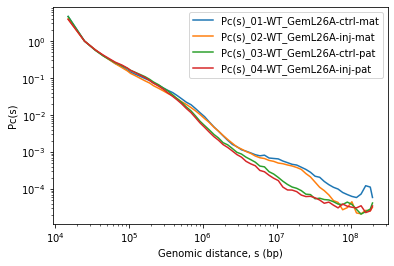

In [2]:
data = 'source_data_mcm.zygotes.b6129sv.aggregate.10k.xls'
sheet_names_list = ['Pc(s)_01-WT_GemL26A-ctrl-mat','Pc(s)_02-WT_GemL26A-inj-mat',
                   'Pc(s)_03-WT_GemL26A-ctrl-pat','Pc(s)_04-WT_GemL26A-inj-pat',
                   ]
for sheet_name in sheet_names_list:
    data_df = pd.read_excel(data,sheet_name=sheet_name)
    plt.loglog(data_df['Genomic distance (bp)'],data_df['Contact probability '],label=sheet_name)
plt.legend()
plt.xlabel('Genomic distance, s (bp)')
plt.ylabel('Pc(s)')

data_ctl_df = pd.read_excel(data,sheet_name=sheet_names_list[2])
data_ctl_df

<Figure size 432x288 with 0 Axes>

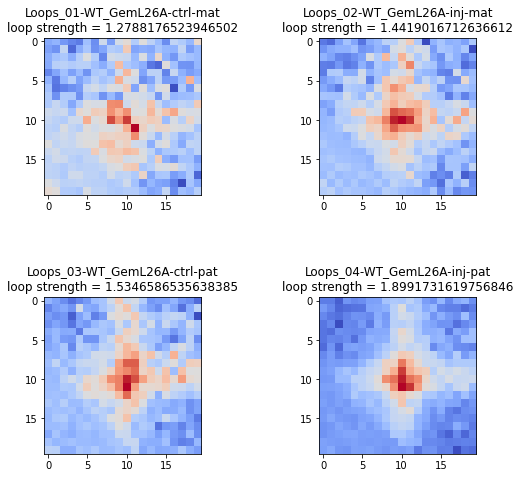

In [3]:
data = 'source_data_mcm.zygotes.b6129sv.aggregate.10k.xls'
sheet_names_list = ['Loops_01-WT_GemL26A-ctrl-mat','Loops_02-WT_GemL26A-inj-mat',
                   'Loops_03-WT_GemL26A-ctrl-pat','Loops_04-WT_GemL26A-inj-pat',
                   ]
fig, gs = _gridspec_inches([3]*2,[3]*2)
for fi,sheet_name in enumerate(sheet_names_list):
    loop_df = pd.read_excel(data,sheet_name=sheet_name)
    M = np.array(loop_df)[:,1:]
    L = 20
    box1 = M[0:L//3,0:L//3] 
    box2 = M[L//2-L//6:L//2+L//6,L//2-L//6:L//2+L//6] 
    box3 = M[L-L//3:L,L-L//3:L] 

    ls = (np.nansum(box2)/(np.nansum(box3)+np.nansum(box1))*2)
    plt.subplot(gs[fi])
    plt.imshow(M,cmap='coolwarm')
    plt.title(f'{sheet_name}\nloop strength = {ls}')


## Get Wapl depletion data

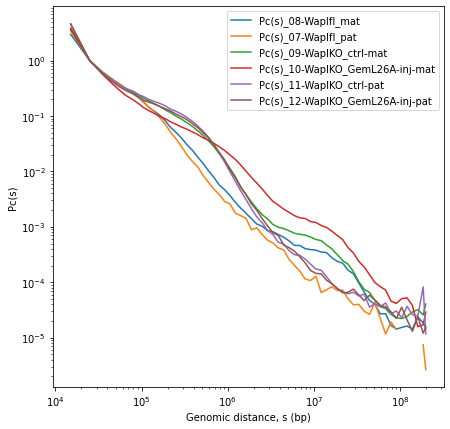

In [4]:
## Get Wapl data
plt.figure(figsize=(7,7))
data = 'source_data_mcm.zygotes.wapl.aggregate.10k.xls'
sheet_names_list = ['Pc(s)_08-Waplfl_mat','Pc(s)_07-Waplfl_pat',
                   'Pc(s)_09-WaplKO_ctrl-mat','Pc(s)_10-WaplKO_GemL26A-inj-mat',
                    'Pc(s)_11-WaplKO_ctrl-pat','Pc(s)_12-WaplKO_GemL26A-inj-pat'  
                   ]
for sheet_name in sheet_names_list:
    data_wapl_df = pd.read_excel(data,sheet_name=sheet_name)
    plt.loglog(data_wapl_df['Genomic distance (bp)'],data_wapl_df['Contact probability '],label=sheet_name)
plt.legend(loc='upper right')
plt.xlabel('Genomic distance, s (bp)')
plt.ylabel('Pc(s)')

pat_wapl_df = pd.read_excel(data,sheet_name='Pc(s)_11-WaplKO_ctrl-pat')

<Figure size 432x288 with 0 Axes>

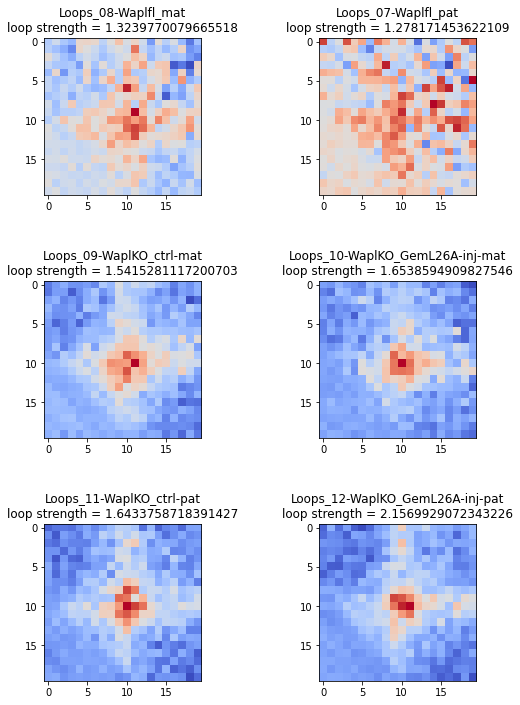

In [5]:
data = 'source_data_mcm.zygotes.wapl.aggregate.10k.xls'
sheet_names_list = ['Loops_08-Waplfl_mat','Loops_07-Waplfl_pat',
                   'Loops_09-WaplKO_ctrl-mat','Loops_10-WaplKO_GemL26A-inj-mat',
                    'Loops_11-WaplKO_ctrl-pat','Loops_12-WaplKO_GemL26A-inj-pat'  
                   ]
fig, gs = _gridspec_inches([3]*2,[3]*3)
for fi,sheet_name in enumerate(sheet_names_list):
    loop_df = pd.read_excel(data,sheet_name=sheet_name)
    M = np.array(loop_df)[:,1:]
    L = 20
    box1 = M[0:L//3,0:L//3] 
    box2 = M[L//2-L//6:L//2+L//6,L//2-L//6:L//2+L//6] 
    box3 = M[L-L//3:L,L-L//3:L] 

    ls = (np.nansum(box2)/(np.nansum(box3)+np.nansum(box1))*2)
    plt.subplot(gs[fi])
    plt.imshow(M,cmap='coolwarm')
    plt.title(f'{sheet_name}\nloop strength = {ls}')

## Do delta MCM (Wapl and Control) conditions - sweep over lambda and d

In [92]:
filefolder = './RandomBoundarySims_refined/'
filelist = [x for x in os.listdir(filefolder) if ('.pkl' in x and 'nsamples10000_' in x and 'RandomTADs' not in x)]
from matplotlib.gridspec import GridSpec
gs = GridSpec(3,4)

TAD_size = 300#250
ordered_filelist = []
fractionBoundaries = [2,8]#[2,4,8,16]#[0]#[0,0.24,0.5,1,1.6,2]
boundaryPauseProb = [0,0.125,0.0625]
processivities = [85,150,200,250]#[85,250,300,350]
separations = [150]
vals = []
for frac in fractionBoundaries:
    for bs in boundaryPauseProb:
        for proc in processivities:
            for sep in separations:
                ordered_filelist += [x for x in filelist if ( ("proc{}".format(proc) in x) \
                                                             and ("sep{}".format(sep) in x) \
                                                             and (f"fractionBoundaries{frac}_" in x) \
                                                             and (f"PauseProb{bs}_" in x) \
                                                            and (f"tadsize{TAD_size}" in x) )]
                vals.append((proc,sep,frac,bs))

len(ordered_filelist),ordered_filelist


(12,
 ['FixedTADs_proc85_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0_nsamples10000_nreps70.pkl',
  'FixedTADs_proc250_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0_nsamples10000_nreps70.pkl',
  'FixedTADs_proc85_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0.125_nsamples10000_nreps70.pkl',
  'FixedTADs_proc250_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0.125_nsamples10000_nreps70.pkl',
  'FixedTADs_proc85_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0.0625_nsamples10000_nreps70.pkl',
  'FixedTADs_proc250_sep150_tadsize300_fractionBoundaries2_boundaryPauseProb0.0625_nsamples10000_nreps70.pkl',
  'FixedTADs_proc85_sep150_tadsize300_fractionBoundaries8_boundaryPauseProb0_nsamples10000_nreps70.pkl',
  'FixedTADs_proc250_sep150_tadsize300_fractionBoundaries8_boundaryPauseProb0_nsamples10000_nreps70.pkl',
  'FixedTADs_proc85_sep150_tadsize300_fractionBoundaries8_boundaryPauseProb0.125_nsamples10000_nreps70.pkl',
  'FixedTADs_proc250_sep

<Figure size 432x288 with 0 Axes>

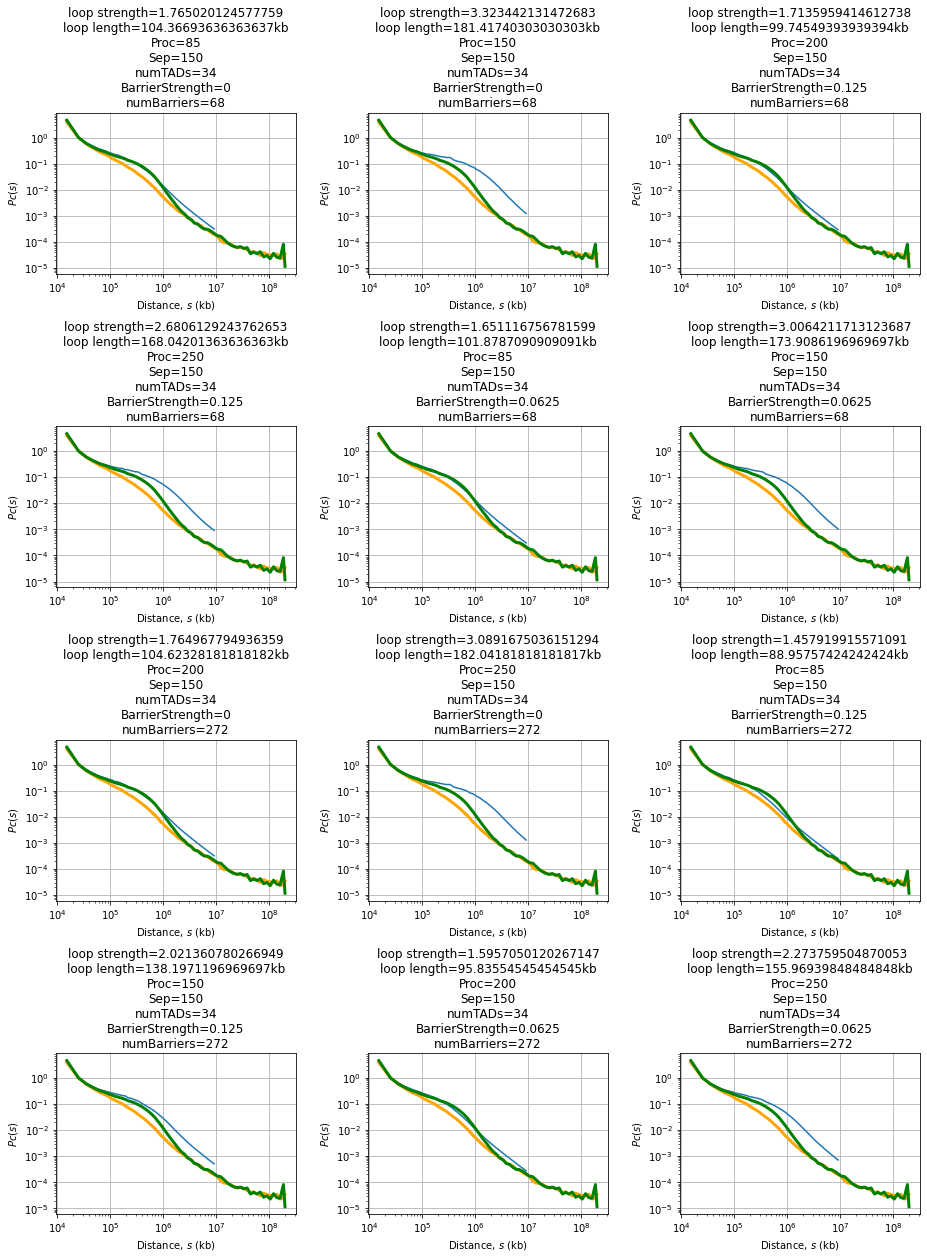

In [77]:
pad=100
shift=100
st_bin = 2 # 25000 kb 
loops_avg_list = []
loopStrengthsList = [] 
Pcs_list = []

fig, gs = _gridspec_inches([4]*3,[4]*6,wspace=0.3,hspace=0.95)

for fi,f in enumerate(ordered_filelist):
    
    file = open(os.path.join(filefolder,f),'rb')
    param_sweep_dict = pickle.load(file)
    Z = param_sweep_dict['Z']
    Zcount = param_sweep_dict['Zcount']
    loopSizes_array = param_sweep_dict['loopSizesArray']
    boundaryPauseProb = param_sweep_dict['randomBoundaryPauseProb']
    randomBarriers = param_sweep_dict['RandomBarriers']
    loopBases = param_sweep_dict['TAD_boundaries']
    TADBoundaries = param_sweep_dict['TAD_boundaries']

    ZZ = Z/Zcount
    ZZ[np.isnan(ZZ)] = 0
    np.fill_diagonal(ZZ,np.mean(np.diag(ZZ))/2)
    ZZ = ZZ + ZZ.T
    data = ZZ
    # get loop strengths
    # skip first and last TADs
    MM=0
    MC=0
    M = 0
    for (stBin,endBin) in zip(loopBases[2:],loopBases[1:-2]):
        if np.abs(endBin-stBin) < pad:
            continue
        #print(stBin,endBin)
        MM += data[stBin - pad:stBin + pad, endBin - pad:endBin + pad]
        MC += data[stBin - pad+shift:stBin + pad+shift, endBin - pad+shift:endBin + pad+shift]
    MC[MC==0] = 1
    M = MM/MC
    M[np.isinf(M)] = 1
    M = zoomArray(M,(60,60))
    loops_avg_list.append(M)
    # divide box into 3 equal spaces
    L = len(M)
    box1 = M[0:L//3,0:L//3] 
    box2 = M[L//2-L//6:L//2+L//6,L//2-L//6:L//2+L//6] 
    box3 = M[L-L//3:L,L-L//3:L] 
    loopStrengthsList.append(np.nansum(box2)/(np.nansum(box3)+np.nansum(box1))*2)


    ## Get contact probability
    dS = Z.col-Z.row
    L_tot = Z.shape[0]
    # use the same log-binning as the data
    lbins = np.r_[0,[int(x) for x in data_df['Genomic distance (bp)'].values/1e3 if x <L_tot]] 
    
    rebinned_dS = np.digitize(dS,lbins,right=True) 
    freq = np.bincount(rebinned_dS,Z.data)
    count_freq = np.bincount(rebinned_dS,Zcount.data)
    Pc = freq/count_freq
    bins = lbins*1e3

    plt.subplot(gs[fi])
    Pc = np.array(Pc)

    file.close()
    plt.loglog(bins[st_bin:],Pc[st_bin:-1]/Pc[st_bin])
    Pcs_list.append(Pc)
    plt.grid('on')
    plt.xlabel('Distance, $s$ (kb)')
    plt.ylabel('$Pc(s)$')
    proc,sep,frac,bs = vals[fi]
    plt.title(f"loop strength={loopStrengthsList[fi]}\nloop length={np.mean(loopSizes_array)}"+
                    f"kb\nProc={proc}\nSep={sep}\nnumTADs={len(TADBoundaries)}\n" + 
               f"BarrierStrength={boundaryPauseProb}\nnumBarriers={len(randomBarriers)}")

    plt.loglog(data_df['Genomic distance (bp)'],data_df['Contact probability '],'orange',label=sheet_name,lw=3)
    plt.loglog(pat_wapl_df['Genomic distance (bp)'],pat_wapl_df['Contact probability '],'g',label=sheet_name,lw=3)

plt.show()


## Plot dot plots

<Figure size 432x288 with 0 Axes>

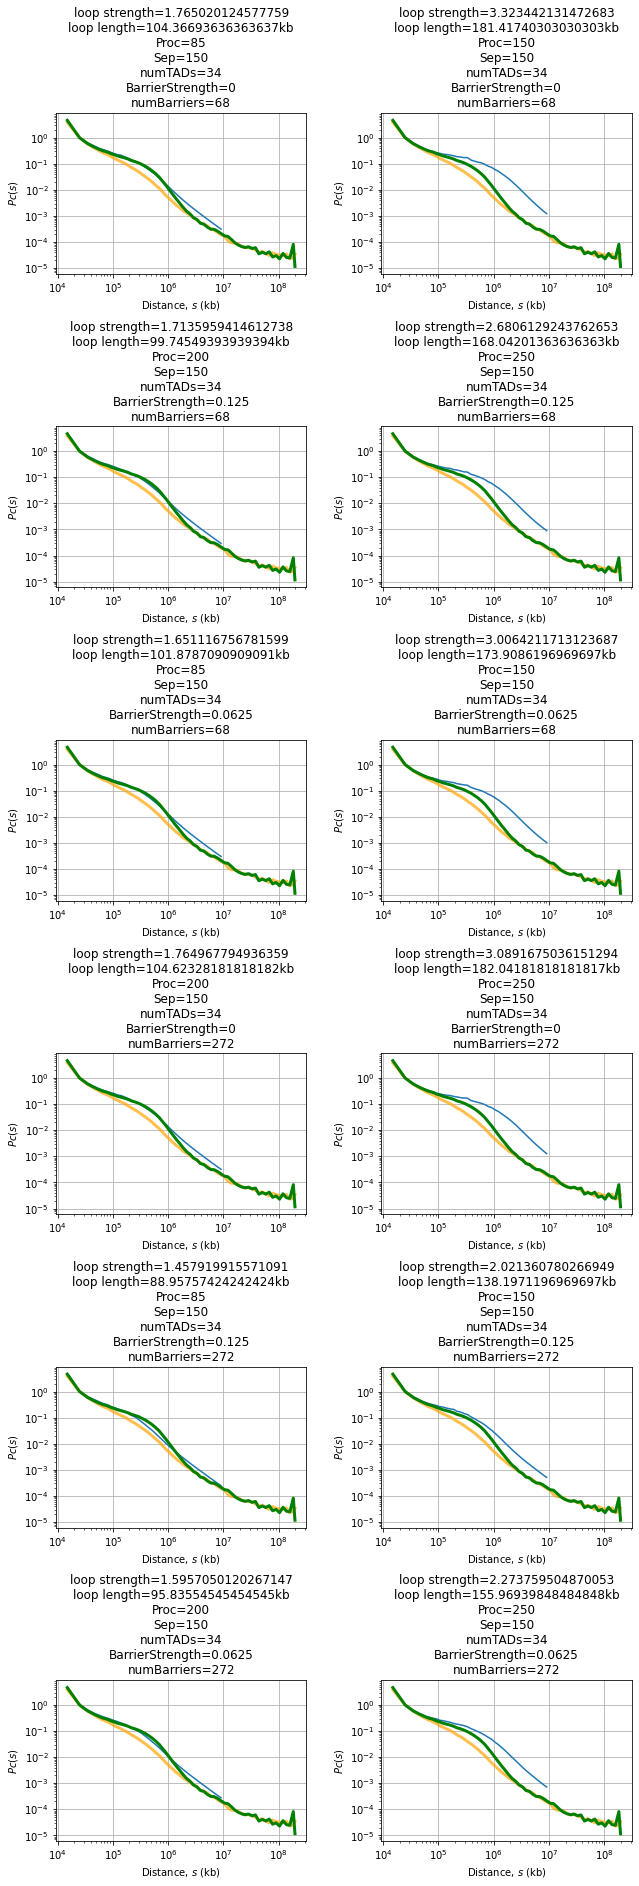

In [95]:
st_bin = 2
fig, gs = _gridspec_inches([4]*2,[4]*6,wspace=0.3,hspace=0.95)
# vals = list(product(separations,processivities))
for fi,f in enumerate(ordered_filelist):
    
    with open(os.path.join(filefolder,f),'rb') as file: 
        param_sweep_dict = pickle.load(file)
        Z = param_sweep_dict['Z']
        Zcount = param_sweep_dict['Zcount']
        loopSizes_array = param_sweep_dict['loopSizesArray']
        boundaryPauseProb = param_sweep_dict['randomBoundaryPauseProb']
        randomBarriers = param_sweep_dict['RandomBarriers']
        loopBases = param_sweep_dict['TAD_boundaries']
        TADBoundaries = param_sweep_dict['TAD_boundaries']
           
    plt.subplot(gs[fi])
    ## Get contact probability
    Pc = Pcs_list[fi]
    plt.grid('on')
    bins = lbins*1e3
    plt.loglog(bins[st_bin:],Pc[st_bin:-1]/Pc[st_bin])
    plt.xlabel('Distance, $s$ (kb)')
    plt.ylabel('$Pc(s)$')
    proc, sep, _, _ = vals[fi]
    plt.title("loop strength={}\nloop length={} kb\nProc={}\nSep={}\nnumTADs={}"
              .format(loopStrengthsList[fi],np.mean(loopSizes_array),proc,
                      sep,len(TADBoundaries)))
    
    plt.title(f"loop strength={loopStrengthsList[fi]}\nloop length={np.mean(loopSizes_array)}"+
                        f"kb\nProc={proc}\nSep={sep}\nnumTADs={len(TADBoundaries)}\n" + 
                   f"BarrierStrength={boundaryPauseProb}\nnumBarriers={len(randomBarriers)}")
        
    plt.loglog(data_df['Genomic distance (bp)'],data_df['Contact probability '],'orange',label=sheet_name,lw=3,alpha=0.7)
#     plt.loglog(data_ctl_df['Genomic distance (bp)'],data_ctl_df['Contact probability '],'k--',label=sheet_name,lw=1,alpha=0.7)
    plt.loglog(pat_wapl_df['Genomic distance (bp)'],pat_wapl_df['Contact probability '],'g',label=sheet_name,lw=3)
        
# plt.savefig('ProcSepSweep_sims_2020_06_01_FixedTAD_Pcs_nsamples10000.pdf',bbox='tight')
# plt.savefig(f'Figure_Simulations_ProcSepSweep_sims_2020_06_01_FixedTAD{TAD_size}_Pcs_nsamples10000.pdf',bbox='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

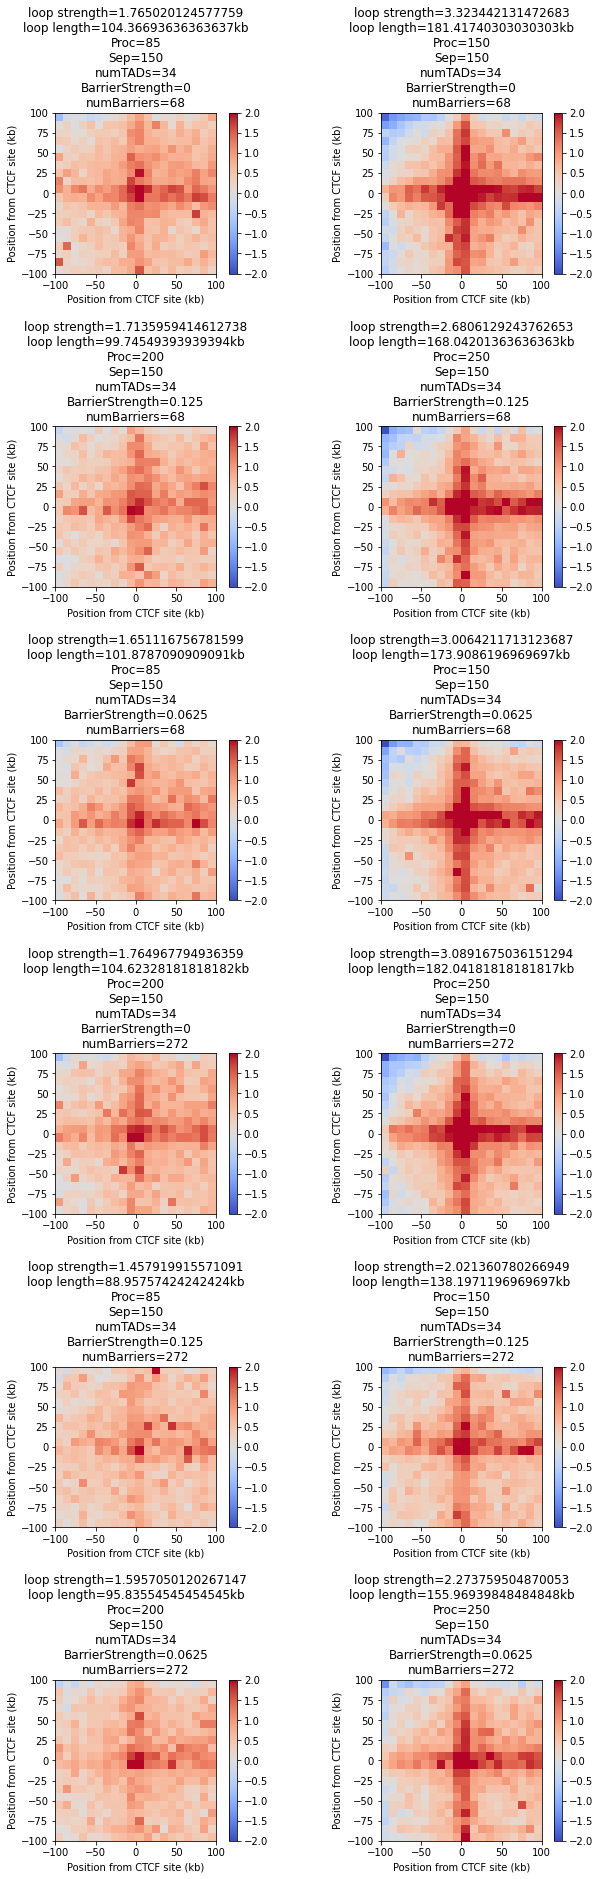

In [97]:
st_bin = 2
fig, gs = _gridspec_inches([4]*2,[4]*6,wspace=0.3,hspace=0.95)
for fi,f in enumerate(ordered_filelist):
    
    with open(os.path.join(filefolder,f),'rb') as file: 
        param_sweep_dict = pickle.load(file)
        Z = param_sweep_dict['Z']
        Zcount = param_sweep_dict['Zcount']
        loopSizes_array = param_sweep_dict['loopSizesArray']
        boundaryPauseProb = param_sweep_dict['randomBoundaryPauseProb']
        randomBarriers = param_sweep_dict['RandomBarriers']
        loopBases = param_sweep_dict['TAD_boundaries']
        TADBoundaries = param_sweep_dict['TAD_boundaries']
           
        plt.subplot(gs[fi])
        M = loops_avg_list[fi]
        plt.imshow(np.log2(zoomArray(M,(20,20))),vmax = 2,vmin=-2,cmap='coolwarm',extent=[-100,100,-100,100])
        plt.colorbar()
        proc, sep, _, _ = vals[fi]
        plt.title(f"loop strength={loopStrengthsList[fi]}\nloop length={np.mean(loopSizes_array)}"+
                        f"kb\nProc={proc}\nSep={sep}\nnumTADs={len(TADBoundaries)}\n" + 
                   f"BarrierStrength={boundaryPauseProb}\nnumBarriers={len(randomBarriers)}")
        plt.xlabel("Position from CTCF site (kb)")
        plt.ylabel("Position from CTCF site (kb)")
    
plt.show()
